# Crop Monitoring using Copernicus Global Land Services

🌱 
Dry Matter Productivity (DMP) represents the overall growth rate or dry biomass increase of the vegetation. Its estimation is useful for *crop monitoring*, *yield forecasting* and the ecosystem *Net Primary Productivity* (NPP). It is function of the incoming solar radiation in the UV-to-NIR spectrum (0.2-3$\mu$m) and land surface temperature.<br>
In this tutorial the DMP variable is visualised on a map at the resolution of 1 km, choosing an area of interest.

In [1]:
import matplotlib, xarray
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import os, sys
sys.path.append(os.path.join(os.path.expanduser("~"),"CLEOPE/Trials/modules"))
import cgls, buttons

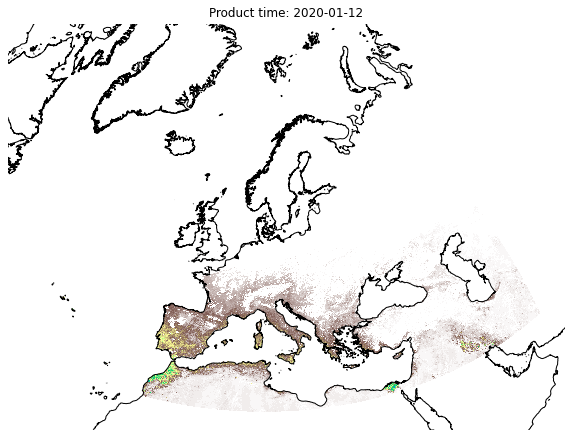

In [2]:
products = cgls.dmp_path()
test_ds = xarray.open_rasterio(products[0])
plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.Orthographic(10,50))
test_ds.plot(ax=ax,transform=ccrs.PlateCarree(),cmap="terrain_r",add_colorbar=False,add_labels=False)
ax.set(title="Product time: "+test_ds.attrs["PRODUCT_TIME"])
ax.outline_patch.set_edgecolor('white')
ax.coastlines("10m")
plt.show()

## Sardinia (Italy) vegetation growth monitoring 

In this example we are going to monitor vegetation growth in Sardinia (Italy) using DMP - Copernicus Land products from January to June 2020.<br>
The [Italian Agricultural Atlas](https://www.expodays.net/wp-content/uploads/2015/06/Atlante-dellagricoltura-italiana.-6%C2%B0-Censimento-generale-dellagricoltura.pdf) cites Sardinia as one of the regions with the highest ratio of the exploited agricultural area per municipality (colorscale given in *SAU* - agricultural area used in hectares per 100 citizens).

<img src="../media/Sardinia_SAU.png" height="400" width="400">

In [3]:
m,dc = cgls.SelectMap()
def handle_draw(self, action, geo_json):
    print("Action: %s"%action)
    print(geo_json["geometry"])
    buttons.save_aoi(geo_json)

dc.on_draw(handle_draw)
m.add_control(dc)
display(m)

Map(center=[40.853294, 14.305573], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title',…

In [4]:
coords = (*tuple(buttons.read_aoi()["coordinates"][0][0]),*tuple(buttons.read_aoi()["coordinates"][0][2])) # xmin,ymin,xmax,ymax
ds_time = cgls.dmp_dataset(products,bounds=coords)

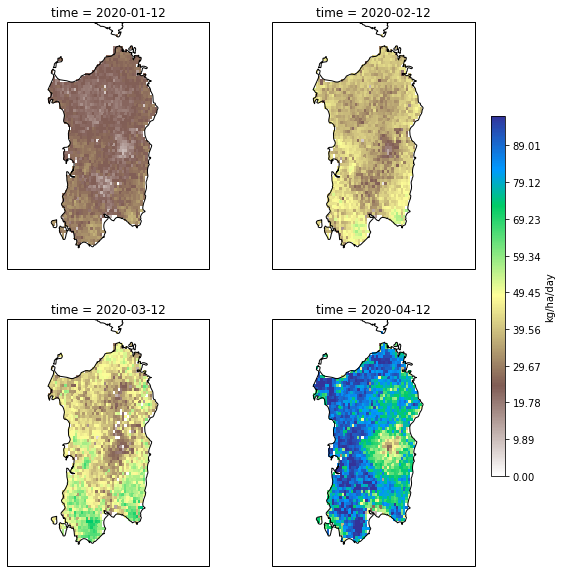

In [5]:
max = np.max([d.quantile(q=0.98) for d in ds_time])
min = np.min([d.quantile(q=0.02) for d in ds_time])
bounds = np.linspace(min, max, 256)
norm = matplotlib.colors.BoundaryNorm(boundaries=bounds, ncolors=256)

fig = plt.figure(figsize=(10,10))
ax = [plt.subplot(2,len(ds_time.time)//2,i+1,projection=ccrs.Orthographic(10,30)) for i in range(len(ds_time.time))]
for i in range(len(ds_time.time)):
    ds_time.isel(time=i).plot(ax=ax[i],transform=ccrs.PlateCarree(),cmap="terrain_r",add_colorbar=False,add_labels=True,vmin=min,vmax=max)
    ax[i].coastlines("10m")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.25, 0.02, 0.5])
cb = matplotlib.colorbar.ColorbarBase(cbar_ax, cmap=matplotlib.cm.terrain_r,norm=norm,orientation='vertical',label='kg/ha/day')